# Expt 5
# Basic Gray Level Transformation

In [1]:
# import dependencies
import cv2
import numpy as np
import matplotlib.pyplot as plt

Dimension:  (741, 1280)


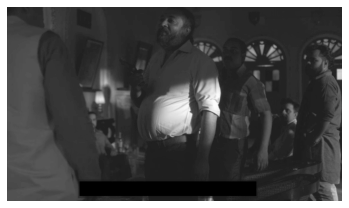

In [2]:
# Reading image
img = cv2.imread("mirzapur.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Displaying image
plt.axis('off')
plt.imshow(img, cmap='gray')

print("Dimension: ", img.shape)

# Image Negative

In [ ]:
# image negative
def Negative(img):
  imgNeg = np.invert(img)
  # imgNeg = ~ img
  
  return imgNeg

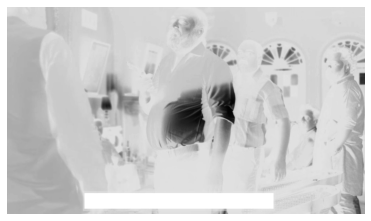

In [ ]:
imgNeg = Negative(img)
plt.axis('off')
plt.imshow(imgNeg, cmap = 'gray')

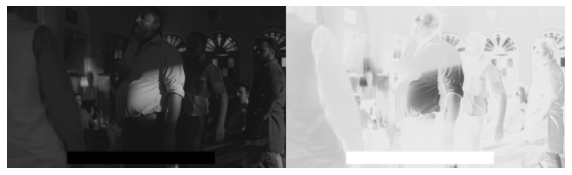

In [ ]:
NegComp = np.hstack((img, imgNeg))
plt.axis('off')
# plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(NegComp, cmap = 'gray')

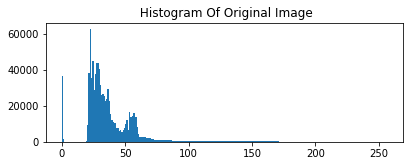

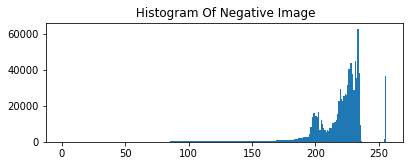

In [ ]:
plt.subplot(2, 1, 1)

plt.hist(img.ravel(), 256, [0, 256])
plt.title(" Histogram Of Original Image")
plt.show()

plt.subplot(2, 1, 2)
plt.hist(imgNeg.ravel(), 256, [0, 256])
plt.title(" Histogram Of Negative Image")
plt.show()

# Log Transformation

In [ ]:
# Log Transform
def LogTrans(img):
  print("---------------Log Transformation---------------")
  c = np.float32(input("Enter the Value of C: "))

  row, col = img.shape
  # imgLog = np.zeros([row, col])
  imgLog = c*(np.log(img + 1))

  imgLog = np.array(imgLog, dtype=np.uint8)

  return imgLog



---------------Log Transformation---------------
Enter the Value of C: 10


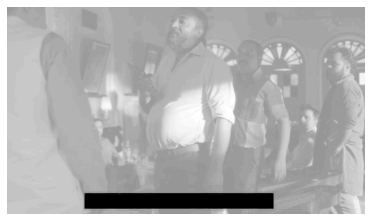

In [ ]:
imgLog = LogTrans(img)
plt.axis('off')
plt.imshow(imgLog, cmap= 'gray')

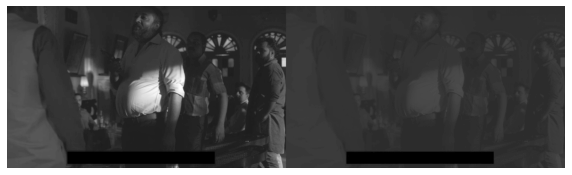

In [ ]:
logComp = np.hstack((img, imgLog))
plt.axis('off')
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(logComp, cmap = 'gray')

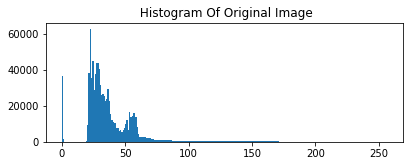

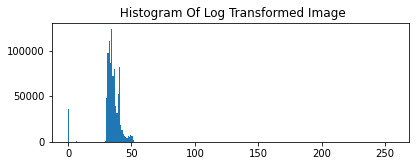

In [ ]:
plt.subplot(2, 1, 1)

plt.hist(img.ravel(), 256, [0, 256])
plt.title(" Histogram Of Original Image")
plt.show()

plt.subplot(2, 1, 2)
plt.hist(imgLog.ravel(), 256, [0, 256])
plt.title(" Histogram Of Log Transformed Image")
plt.show()

# Anti Log Transformation

In [ ]:
# Anti Log Transform
def AntiLogTrans(img):
  print("---------------Anti Log Transformation---------------")
  c = np.float32(input("Enter the Value of C: "))

  row, col = img.shape
  # imgLog = np.zeros([row, col])
  imgAntiL = c*(np.exp(img + 1))

  imgAntiL = np.array(imgAntiL, dtype=np.uint8)

  return imgAntiL

---------------Anti Log Transformation---------------
Enter the Value of C: 3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


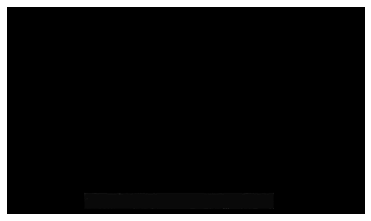

In [ ]:
imgAntiL = AntiLogTrans(img)
plt.axis('off')
plt.imshow(imgAntiL, cmap= 'gray')

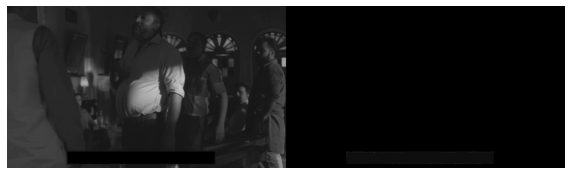

In [ ]:
AntilogComp = np.hstack((img, imgAntiL))
plt.axis('off')
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(AntilogComp, cmap = 'gray')

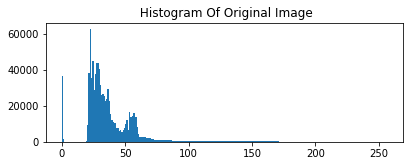

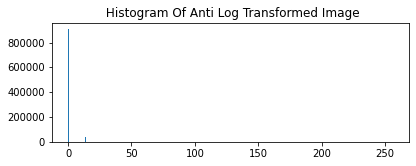

In [ ]:
plt.subplot(2, 1, 1)

plt.hist(img.ravel(), 256, [0, 256])
plt.title(" Histogram Of Original Image")
plt.show()

plt.subplot(2, 1, 2)
plt.hist(imgAntiL.ravel(), 256, [0, 256])
plt.title(" Histogram Of Anti Log Transformed Image")
plt.show()

# Power Law Transform

In [ ]:
def PLTrans(img):
  print("-------------Power Law Transform-------------")
  c = np.float32(input("Enter the Value Of C: "))
  gamma = np.float32(input("Enter the Value Of Gamma: "))

  imgPLT = c*((img/255) ** gamma)
  imgPLT = np.array(imgPLT, dtype = np.uint8)

  return imgPLT

-------------Power Law Transform-------------
Enter the Value Of C: 255
Enter the Value Of Gamma: 0.5


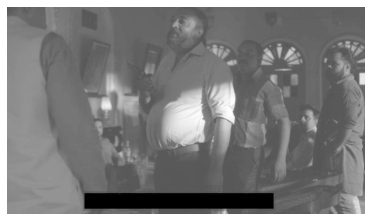

In [ ]:
imgPLT = PLTrans(img)
plt.axis('off')
plt.imshow(imgPLT, cmap = 'gray')

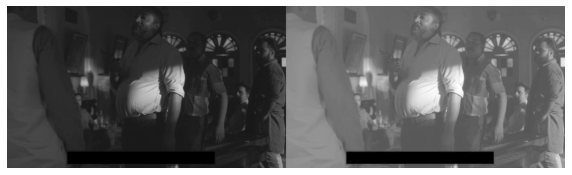

In [ ]:
logComp = np.hstack((img, imgPLT))
plt.axis('off')
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(logComp, cmap = 'gray')

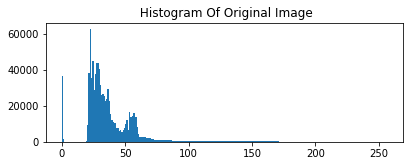

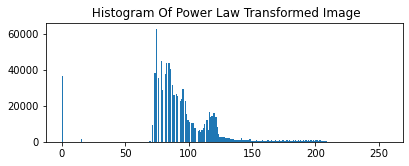

In [ ]:
plt.subplot(2, 1, 1)

plt.hist(img.ravel(), 256, [0, 256])
plt.title(" Histogram Of Original Image")
plt.show()

plt.subplot(2, 1, 2)
plt.hist(imgPLT.ravel(), 256, [0, 256])
plt.title(" Histogram Of Power Law Transformed Image")
plt.show()

# Contrast Stretching

In [ ]:
# This approach requires heavy computation power So Don't Run this cell.
# This is only to refer and Understand the process of normalization of Histogram i.e, Contrast stretching

# Create zeros array to store the stretched image
minmax_img = np.zeros((img.shape[0],img.shape[1]),dtype = 'uint8')
 
# Loop over the image and apply Min-Max formulae
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        minmax_img[i,j] = 255*(img[i,j]-np.min(img))/(np.max(img)-np.min(img))
 

In [4]:
# Simple approach for Contrast Stretching

cs_img = cv2.equalizeHist(img)

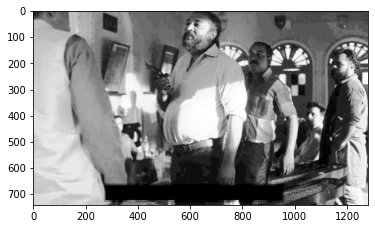

In [7]:
plt.imshow(cs_img, cmap='gray')

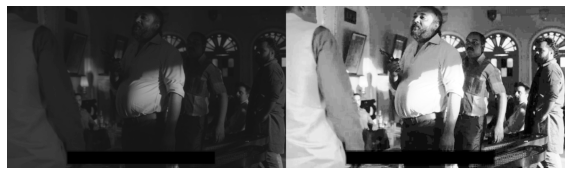

In [10]:
CSComp = np.hstack((img, cs_img))
plt.axis('off')
plt.rcParams['figure.figsize'] = (10, 10)
plt.imshow(CSComp, cmap = 'gray')

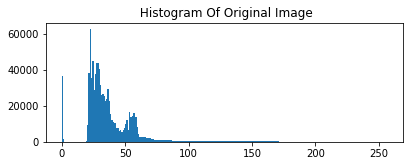

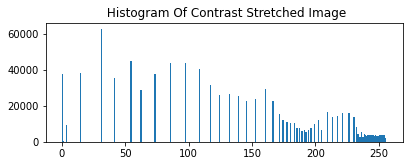

In [13]:
plt.subplot(2, 1, 1)

plt.hist(img.ravel(), 256, [0, 256])
plt.title(" Histogram Of Original Image")
plt.show()

plt.subplot(2, 1, 2)
plt.hist(cs_img.ravel(), 256, [0, 256])
plt.title(" Histogram Of Contrast Stretched Image")
plt.show()

In [12]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

# Grey Level Slicing

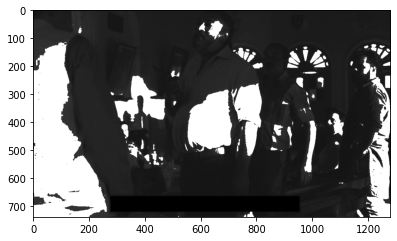

In [25]:
# Create a blank img
GLSimg = np.zeros((img.shape[0], img.shape[1]), dtype = int)

# Range of values to be sliced (Values in this range will be made 255 (White) )
T1 = 50
T2 = 180

# iterate over each value, compare and slice
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
          
        if T1 < img[i,j] < T2: 
            GLSimg[i,j]= 255
        else:
            GLSimg[i,j] = img[i,j]

plt.imshow(GLSimg, cmap='gray')

## Conclusion:
### Basic Gray Level Transformation was successfully studied and implemented.